In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Example: https://www.kaggle.com/code/rali144/log-normal-distribution/notebook

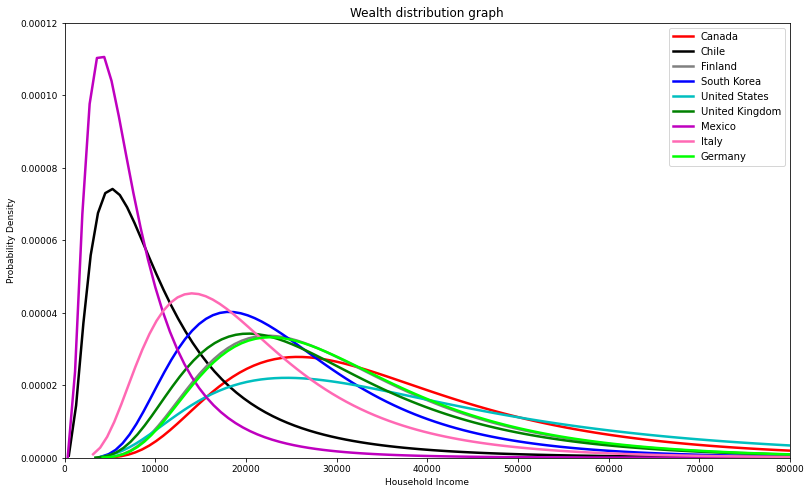

In [2]:
plt.figure(figsize=(13,8))

# Data collected from World Bank.
color = ['r', 'k', 'gray', 'b', 'c', 'g', 'm', 'hotpink', 'lime', 'y']
countries = ['Canada', 'Chile', 'Finland', 'South Korea', 'United States', 'United Kingdom', 'Mexico', 'Italy', 'Germany']
mu_countries = [10.3984899, 9.14558636, 10.24047662, 10.04203869, 10.48117837, 10.17196315, 8.781295311, 9.843113525, 10.25328085]
sigma_countries = [0.493306287, 0.773320443, 0.472658046, 0.4850775, 0.611671832, 0.505692298, 0.702435424, 0.540310432, 0.472658046]

for i in range(9):
    s = np.random.lognormal(mu_countries[i], sigma_countries[i], 10000)
    count, bins, ignored = plt.hist(s, 100, ec='k', density=True, alpha=0.0)
    x = np.linspace(min(bins), 80000, 100)
    pdf = (np.exp(-(np.log(x) - mu_countries[i])**2 / (2 * sigma_countries[i]**2)) / (x * sigma_countries[i] * np.sqrt(2 * np.pi)))
    plt.plot(x, pdf, linewidth=2.5, color=color[i], label=countries[i])

# Graph settings
plt.title('Wealth distribution graph')
plt.ylabel('Probability Density',fontsize=9)
plt.xlabel('Household Income',fontsize=9)
plt.tick_params(axis='both',labelsize=9)
plt.axis([0, 80000, 0, 0.00012])
plt.legend(loc='upper right')
plt.show()

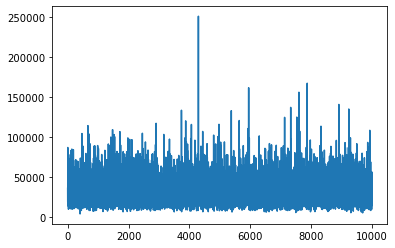

In [6]:
plt.plot(s)

## Get original data without log

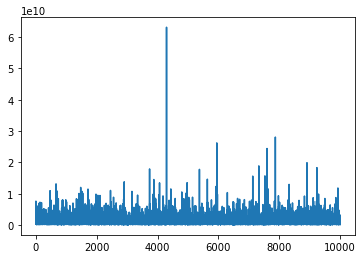

In [10]:
data_orig=s**2
plt.plot(data_orig)

In [11]:
#can we detect power law?
def plot_ccdf(rvs):
    """Plot complementary cumulative distribution function (CCDF) of
    a possibly power-law distributed sample.

    Input arguments:
    rvs   - Analyzed random sample
    """
    # Calculate complementary CDF
    n = np.size(rvs)
    xcdf, ycdf = np.sort(rvs), np.arange(n, 0, -1) / float(n)

    # Visualize the CDF
    fig = plt.figure(figsize=(8, 6))
    ax1 = fig.add_subplot(111)
    ax1.loglog(xcdf, ycdf, 'o', fillstyle='none')


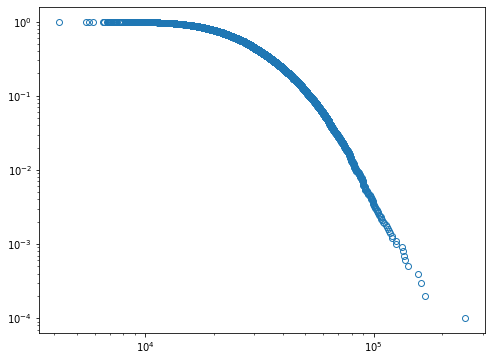

In [14]:
plot_ccdf(s)

(array([  1.,   0.,   0.,   2.,   1.,   5.,  15.,   9.,  25.,  41.,  70.,
         65., 117., 148., 220., 281., 370., 417., 504., 564., 647., 627.,
        674., 712., 684., 605., 553., 529., 451., 384., 327., 262., 198.,
        169., 101.,  89.,  47.,  37.,  19.,  11.,   6.,   4.,   5.,   0.,
          2.,   1.,   0.,   0.,   0.,   1.]),
 array([ 8.34176972,  8.42362607,  8.50548243,  8.58733878,  8.66919513,
         8.75105148,  8.83290783,  8.91476418,  8.99662053,  9.07847688,
         9.16033323,  9.24218959,  9.32404594,  9.40590229,  9.48775864,
         9.56961499,  9.65147134,  9.73332769,  9.81518404,  9.89704039,
         9.97889675, 10.0607531 , 10.14260945, 10.2244658 , 10.30632215,
        10.3881785 , 10.47003485, 10.5518912 , 10.63374756, 10.71560391,
        10.79746026, 10.87931661, 10.96117296, 11.04302931, 11.12488566,
        11.20674201, 11.28859836, 11.37045472, 11.45231107, 11.53416742,
        11.61602377, 11.69788012, 11.77973647, 11.86159282, 11.94344917,
 

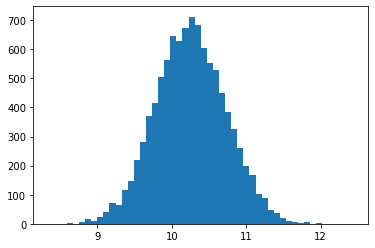

In [16]:
plt.hist(np.log(s), bins=50)